Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau()
#def transform(x):
#    return 5. * x
like = Rosenbrock(4)
def transform(x):
    return 5. * x
#like = Gaussian(2, 0.9)
#def transform(x):
#    return 3. * x
#like = Eggbox()
#def transform(x):
#    return x * 5 * np.pi
#like = GaussianShell(2)
#def transform(x):
#    return 5. * x
#like = GaussianMix(2)
#def transform(x):
#    return 10. * x

In [6]:
sampler = NestedSampler(like.x_dim, like.loglike, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run53
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=2, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=46, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=2, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [20]
[nnest.sampler] [INFO] Initial scale [1.0000]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0227]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0377] validation loss [0.0396]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0338] validation loss [0.0361]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0322] validation loss [0.0351]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0307] validation loss [0.0343]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0298] validation loss [0.0342]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0290] validation loss [0.0343]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0288] validation loss [0.0343]
[nnest.trainer] [INFO] Epoch [343] ran out of patience
[nnest.trainer] [INFO] Best epoch [293] validation loss [0.0341]
[nnest.sampler] [INFO] Step [0] loglstar [-2.0850e+05] max logl [-1.4993e+02] logz [-2

[nnest.trainer] [INFO] Training jitter [0.0065]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0126] validation loss [-0.0135]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0194] validation loss [-0.0184]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0200] validation loss [-0.0188]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.0205] validation loss [-0.0188]
[nnest.trainer] [INFO] Epoch [184] ran out of patience
[nnest.trainer] [INFO] Best epoch [134] validation loss [-0.0188]
[nnest.sampler] [INFO] Acceptance [0.2650] min ESS [5.1819] max ESS [11.7678] average jump distance [0.0833]
[nnest.sampler] [INFO] Step [5000] loglstar [-3.7357e+02] maxlogl [-4.6161e+00] logz [-3.8385e+02] vol [6.73795e-03] ncalls [46925] scale [0.8594]
[nnest.sampler] [INFO] Acceptance [0.5800] min ESS [4.6559] max ESS [8.1672] average jump distance [0.0657]
[nnest.sampler] [INFO] Step [5200] loglstar [-3.1291e+02] maxlogl [-4.6161e+00] logz [-3.2387e+02] vol [5.51656e-03] ncalls [49670] scale [0.5

[nnest.sampler] [INFO] Acceptance [0.5800] min ESS [8.1119] max ESS [19.1542] average jump distance [0.0292]
[nnest.sampler] [INFO] Step [9400] loglstar [-2.2273e+01] maxlogl [-3.7955e-01] logz [-3.4161e+01] vol [8.27241e-05] ncalls [110807] scale [0.0835]
[nnest.sampler] [INFO] Acceptance [0.4200] min ESS [10.8049] max ESS [14.7102] average jump distance [0.0399]
[nnest.sampler] [INFO] Step [9600] loglstar [-1.9849e+01] maxlogl [-3.7955e-01] logz [-3.1779e+01] vol [6.77287e-05] ncalls [113773] scale [0.2170]
[nnest.sampler] [INFO] Acceptance [0.5450] min ESS [2.8684] max ESS [7.1202] average jump distance [0.0347]
[nnest.sampler] [INFO] Step [9800] loglstar [-1.7876e+01] maxlogl [-2.6229e-01] logz [-2.9851e+01] vol [5.54516e-05] ncalls [116927] scale [0.1188]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0020]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0612] validation loss [-0.0621]
[nnest.trainer] [INFO] Epoch [50] train loss

[nnest.sampler] [INFO] Acceptance [0.5350] min ESS [8.1060] max ESS [12.0523] average jump distance [0.0430]
[nnest.sampler] [INFO] Step [13800] loglstar [-2.9935e+00] maxlogl [-7.3323e-02] logz [-1.6499e+01] vol [1.01563e-06] ncalls [177782] scale [0.6893]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0008]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1008] validation loss [-0.1006]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.1054] validation loss [-0.1046]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.1061] validation loss [-0.1048]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.1065] validation loss [-0.1050]
[nnest.trainer] [INFO] Epoch [153] ran out of patience
[nnest.trainer] [INFO] Best epoch [103] validation loss [-0.1055]
[nnest.sampler] [INFO] Acceptance [0.5650] min ESS [5.9524] max ESS [14.4766] average jump distance [0.0296]
[nnest.sampler] [INFO] Step [14000] loglstar [-2.7249e+00] maxlogl [-7.3323e-02] l

In [8]:
print(sampler.logz)

-15.2656496372556


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

6930.74026438005
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.5455220E-01  4.1521083E-01  6.7426947E-01  1.1523852E+00  two   -1.9498864E-01  1.2684922E+00  two   -9.2036393E-01  1.2837784E+00  two     p_{1}
param2      7.4409083E-01  3.7925623E-01  4.3940745E-01  1.2247156E+00  two    1.2567773E-02  1.3723300E+00  two   -6.4539989E-02  1.4626861E+00  two     p_{2}
param3      6.9971775E-01  5.4444465E-01 -1.9983719E-02  1.0239076E+00  two   -1.1518811E-01  1.7520099E+00  two   -1.5911439E-01  2.0873643E+00  two     p_{3}
param4      7.8653563E-01  9.8642145E-01 -1.1939742E-01  9.7504714E-01  two   -1.8089134E-01  2.9518621E+00  two   -2.0777103E-01  4.4638332E+00  two     p_{4}



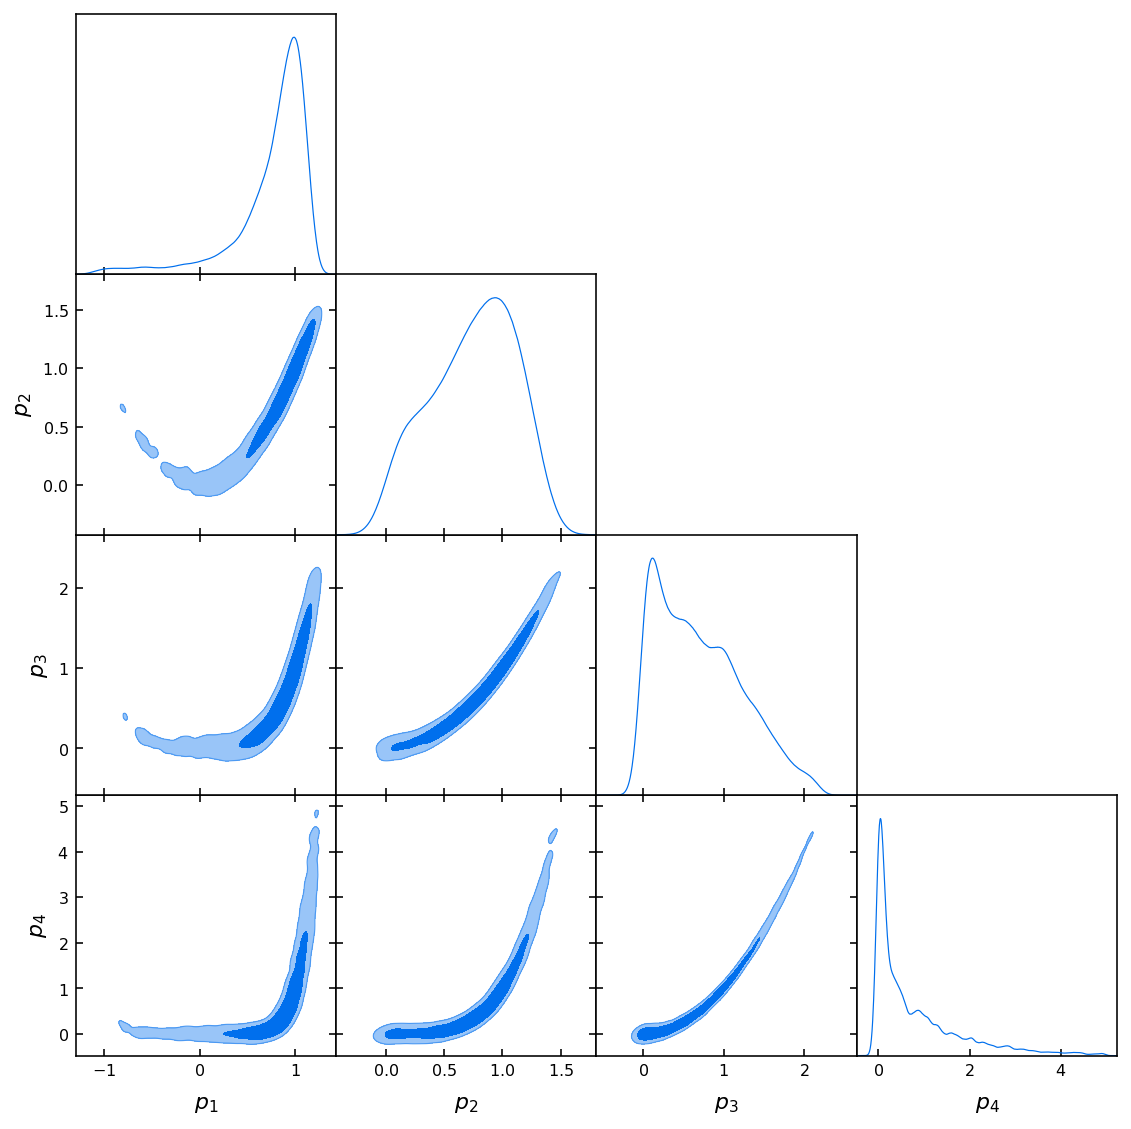

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)